# Hands-on Session 2. CNN (convolutional neural network)

![alt text](https://adeshpande3.github.io/assets/Cover.png)

### Convolution

- Channel
- Kernel(filter) size
- Stride
- Padding


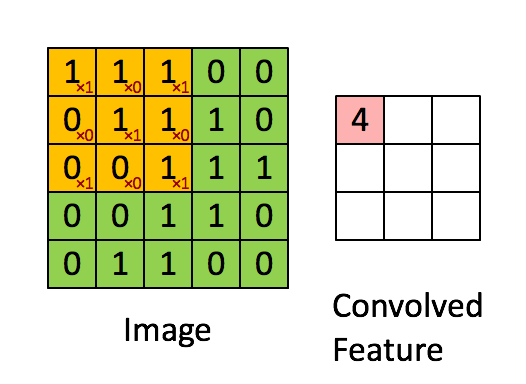

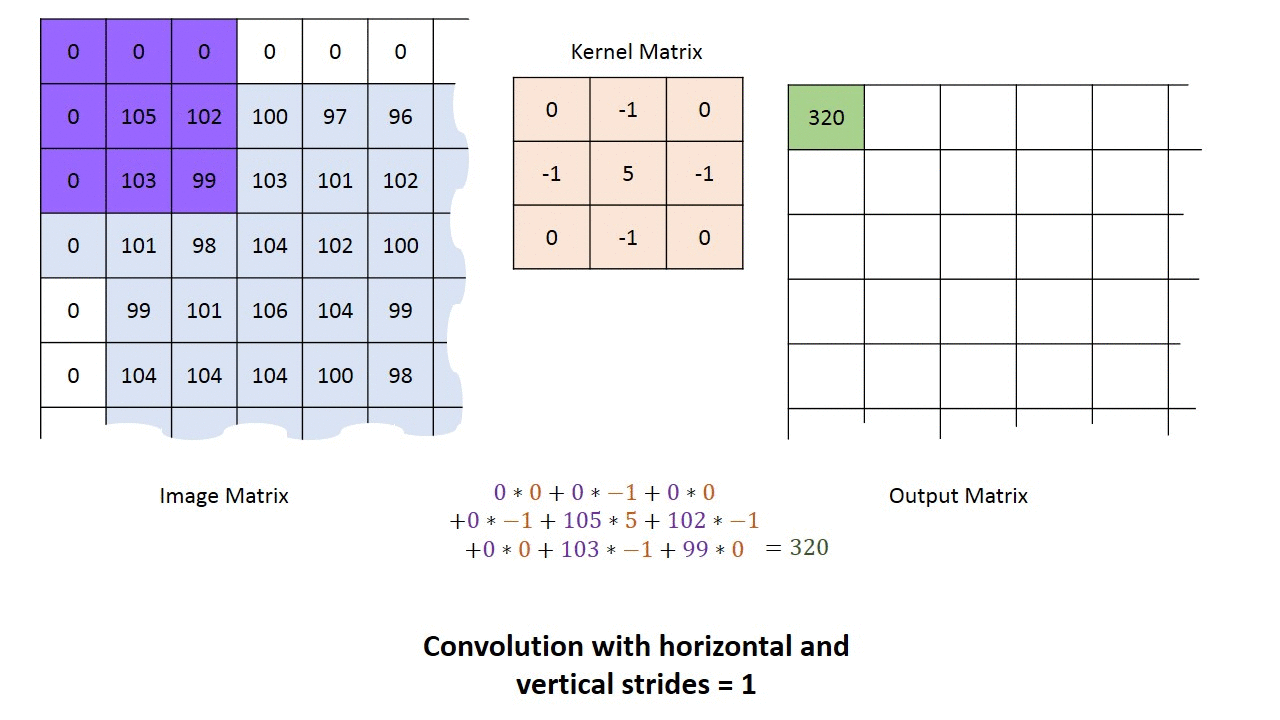



*   [Dilated convolutions](https://arxiv.org/abs/1511.07122)

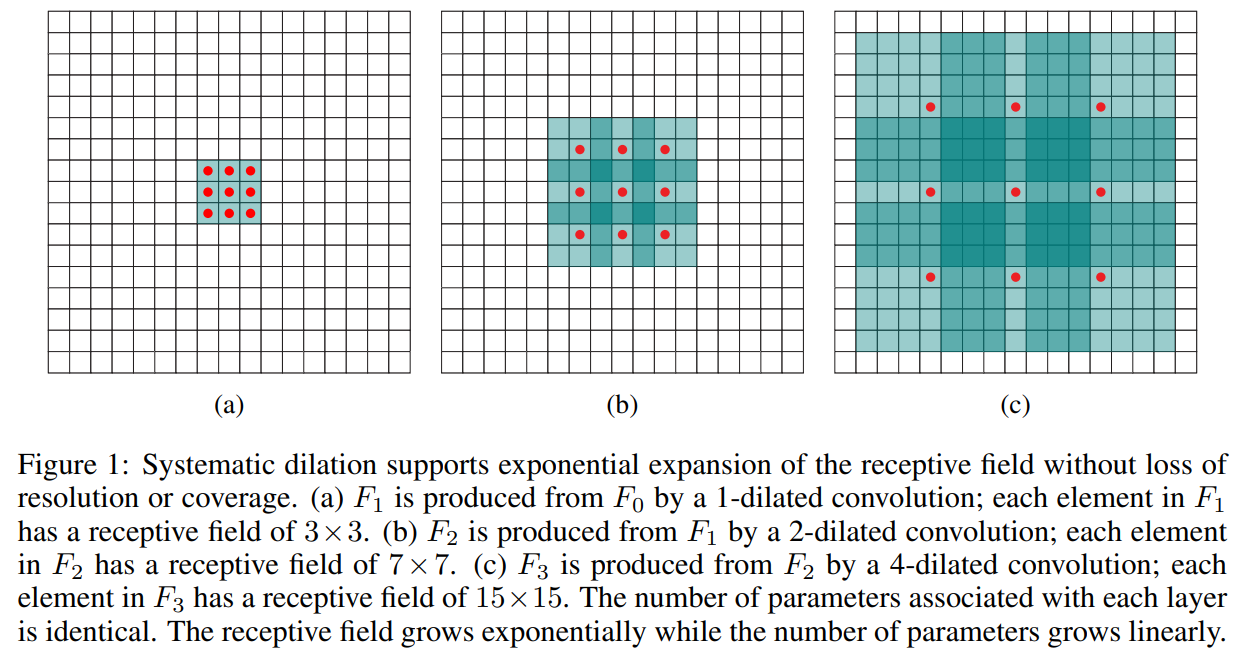




### Pooling


*   Kernel(filter) size
*   Stride


![alt text](https://taewanmerepo.github.io/2018/02/cnn/maxpulling.png)

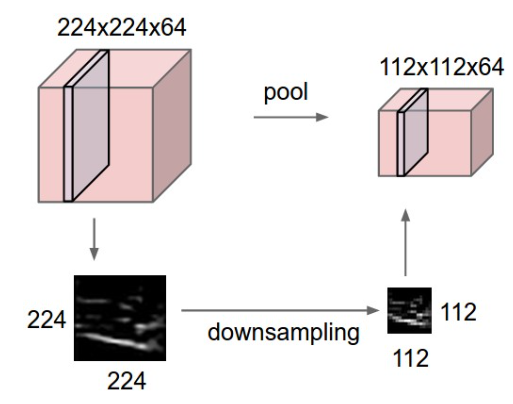

#### 0. 시작에 앞서



*   런타임 > 런타임 유형 변경 > GPU



### 1. 데이터 준비

#### 1) 데이터 다운로드



In [1]:
!pwd # 현재 경로 확인

/content


In [2]:
!ls # 현재 경로 내용 확인

AMC_chestxray_PGGAN  AMC_chestxray_PGGAN.zip  dataset


In [3]:
!rm -rf * # (필요시) 현재 경로 내용 삭제

In [4]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/AMC_chestxray_PGGAN.zip

--2022-08-19 01:36:27--  https://raw.githubusercontent.com/mi2rl/datasets/master/AMC_chestxray_PGGAN.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92629342 (88M) [application/zip]
Saving to: ‘AMC_chestxray_PGGAN.zip’

AMC_chestxray_PGGAN 100%[===================>]  88.34M   212MB/s    in 0.4s    

2022-08-19 01:36:29 (212 MB/s) - ‘AMC_chestxray_PGGAN.zip’ saved [92629342/92629342]



In [5]:
!ls # 데이터 다운로드 확인

AMC_chestxray_PGGAN.zip


In [ ]:
# 압축 풀기
!unzip AMC_chestxray_PGGAN.zip

In [8]:
!ls # 데이터 압축 해제 확인

AMC_chestxray_PGGAN  AMC_chestxray_PGGAN.zip


In [9]:
!ls AMC_chestxray_PGGAN # 데이터 구성 확인

interstitialOpacity  nodule  normal


#### 2) 데이터 출처

CNN을 이용한 이미지 생성기 (모델 PGGAN)을 학습해, 합성 이미지 생성 (본 Hand-On에 사용된 모든 데이터는 합성 이미지)

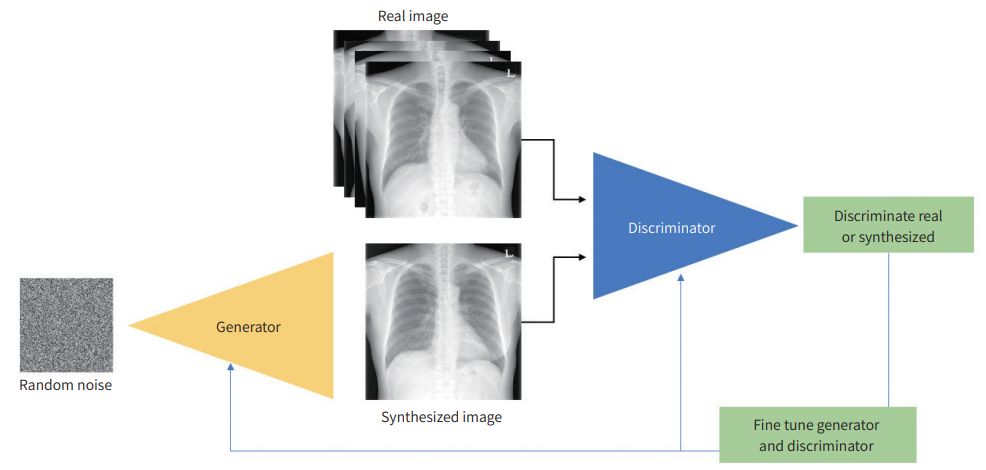

[논문 - 딥러닝 기반 의료영상 분석을 위한 데이터 증강 기법](https://jksronline.org/pdf/10.3348/jksr.2020.0158)

#### 3) 데이터 파악

In [10]:
# 필요한 패키지 불러오기
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
PATH_DATA = "AMC_chestxray_PGGAN" # 데이터 위치
class_names = os.listdir(PATH_DATA) # 폴더 이름을 통한 각 클래스의 이름
num_class = len(class_names) # 클래스 개수

print ("Class names:", class_names)
print ("# of classes:", num_class, "\n")

# 각 클래스 별 영상의 수
for idx in range(len(class_names)):
    imgs = os.listdir(os.path.join(PATH_DATA, class_names[idx]))
    print ("Class -", class_names[idx], "->", len(imgs), "images")

Class names: ['nodule', 'interstitialOpacity', 'normal']
# of classes: 3 

Class - nodule -> 1000 images
Class - interstitialOpacity -> 1000 images
Class - normal -> 1000 images


In [12]:
os.listdir(os.path.join(PATH_DATA, class_names[0]))[:10] # 파일명 확인해보기 (몇개만)

['img033264.png',
 'img044936.png',
 'img096073.png',
 'img058591.png',
 'img069081.png',
 'img090184.png',
 'img046698.png',
 'img059388.png',
 'img055117.png',
 'img010010.png']

<<< Normal data description >>>
# of images: 1000
image size: (224, 224)
filename: img000201.png


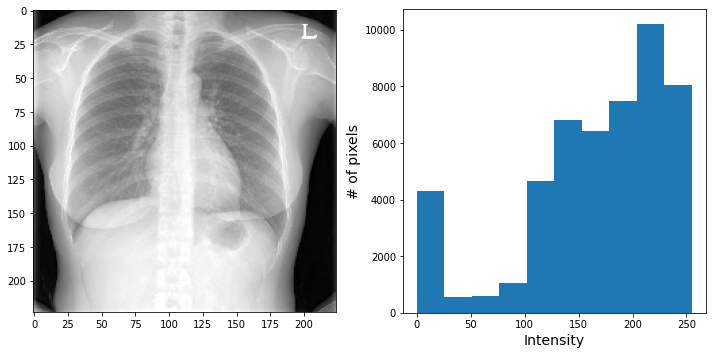

In [13]:
# 영상 확인해보기 (normal)

# 영상 정보
imgs_normal = os.listdir(os.path.join(PATH_DATA, "normal"))
idx_sample = np.random.randint(len(imgs_normal))
img_sample = cv2.imread(os.path.join(PATH_DATA, "normal", imgs_normal[idx_sample]), 0)

print ("<<< Normal data description >>>")
print ("# of images:", len(imgs_normal))
print ("image size:", img_sample.shape)
print ("filename:", imgs_normal[idx_sample])

# 영상 출력 with histogram (픽셀값 분포)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_sample, cmap='gray')
plt.subplot(122)
plt.hist(img_sample.flatten())
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("# of pixels", fontsize=14)
plt.tight_layout()
plt.show()

<<< InterstitialOpacity data description >>>
# of images: 1000
image size: (224, 224)
filename: img003715.png


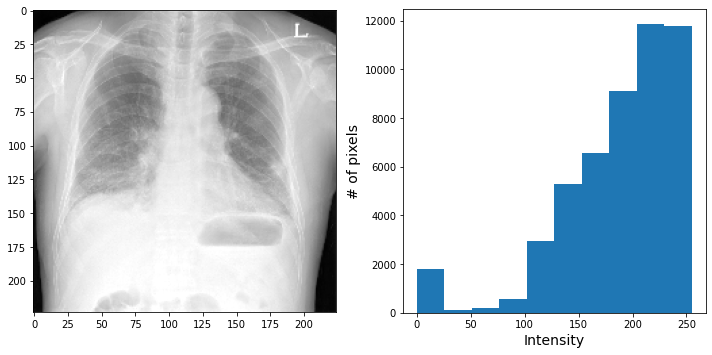

In [14]:
# 영상 확인해보기 (interstitial opacity)

# 영상 정보
imgs_interstitialOpacity = os.listdir(os.path.join(PATH_DATA, "interstitialOpacity"))
idx_sample = np.random.randint(len(imgs_interstitialOpacity))
img_sample = cv2.imread(os.path.join(PATH_DATA, "interstitialOpacity", imgs_interstitialOpacity[idx_sample]), 0)

print ("<<< InterstitialOpacity data description >>>")
print ("# of images:", len(imgs_interstitialOpacity))
print ("image size:", img_sample.shape)
print ("filename:", imgs_interstitialOpacity[idx_sample])

# 영상 출력 with histogram (픽셀값 분포)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_sample, cmap='gray')
plt.subplot(122)
plt.hist(img_sample.flatten())
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("# of pixels", fontsize=14)
plt.tight_layout()
plt.show()

#### 4) 데이터 나누기 


*   Training / Validation / Test
*   Training / Tuning / Validation

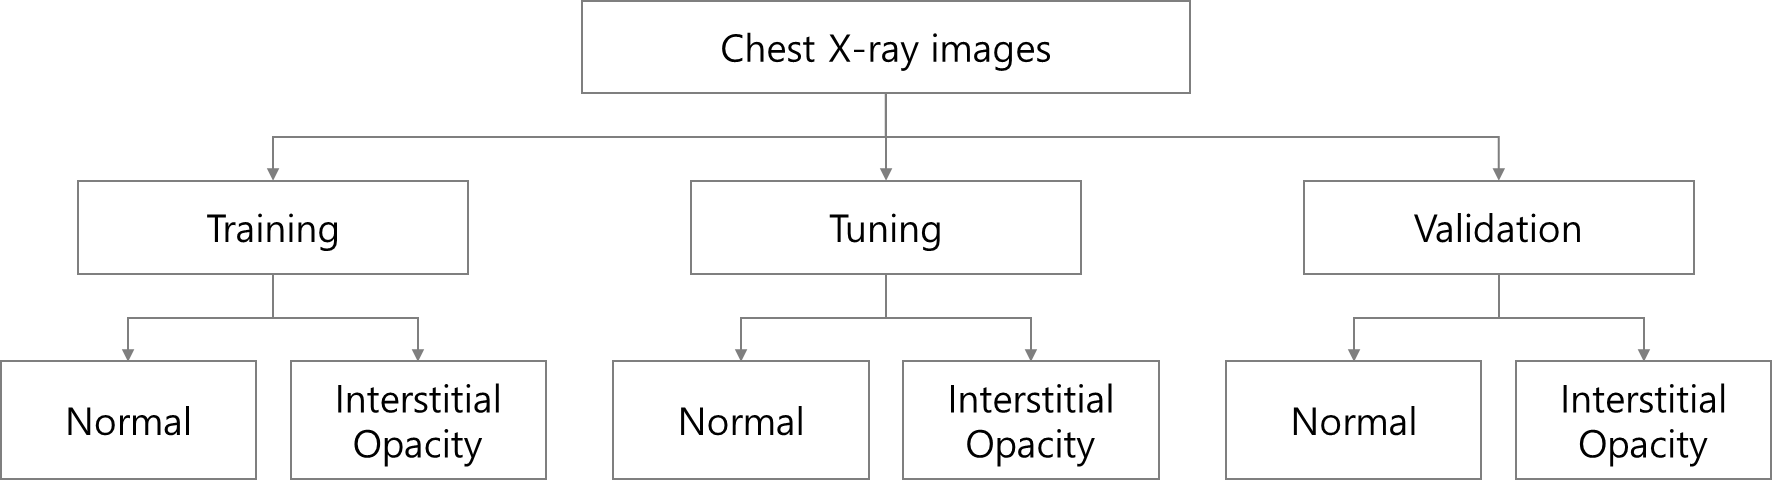



In [15]:
import shutil

# dataset 폴더 만들기
if os.path.exists("dataset"): # 이미 있다면 삭제
    shutil.rmtree("dataset") 

os.mkdir("dataset")

!ls

AMC_chestxray_PGGAN  AMC_chestxray_PGGAN.zip  dataset


In [16]:
# dataset 폴더 내에 train / tuning / valid 폴더 만들기
os.mkdir("dataset/train")
os.mkdir("dataset/tuning")
os.mkdir("dataset/valid")

!ls dataset

train  tuning  valid


In [17]:
import random

# 데이터 비율 정하기
frac_train = 0.7
frac_tuning = 0.1
frac_valid = 0.2

# 각 클래스별, 데이터 비율대로 나누기
for idx in range(1, len(class_names)):

    os.mkdir(os.path.join("dataset/train/", class_names[idx]))
    os.mkdir(os.path.join("dataset/tuning/", class_names[idx]))
    os.mkdir(os.path.join("dataset/valid/", class_names[idx]))

    imgs = os.listdir(os.path.join(PATH_DATA, class_names[idx]))
    num_train = int(len(imgs) * frac_train)
    num_tuning = int(len(imgs) * frac_tuning)
    num_valid = len(imgs) - num_train - num_tuning

    random.shuffle(imgs)
    imgs_train = imgs[:num_train]
    imgs_tuning = imgs[num_train:num_train+num_tuning]
    imgs_valid = imgs[num_train+num_tuning:]

    # 복사
    for idx_img in range(len(imgs_train)): # train
        shutil.copy(os.path.join(PATH_DATA, class_names[idx], imgs_train[idx_img]), os.path.join("dataset/train", class_names[idx]))

    for idx_img in range(len(imgs_tuning)): # tuning
        shutil.copy(os.path.join(PATH_DATA, class_names[idx], imgs_tuning[idx_img]), os.path.join("dataset/tuning", class_names[idx]))

    for idx_img in range(len(imgs_valid)): # valid
        shutil.copy(os.path.join(PATH_DATA, class_names[idx], imgs_valid[idx_img]), os.path.join("dataset/valid", class_names[idx]))
    
    print ("Class -", class_names[idx])
    print ("# of train set:", len(imgs_train))
    print ("# of tuning set:", len(imgs_tuning))
    print ("# of valid set:", len(imgs_valid), "\n")

Class - interstitialOpacity
# of train set: 700
# of tuning set: 100
# of valid set: 200 

Class - normal
# of train set: 700
# of tuning set: 100
# of valid set: 200 



In [18]:
!ls dataset/train

interstitialOpacity  normal


In [19]:
len(os.listdir("dataset/train/normal")), len(os.listdir("dataset/tuning/normal")), len(os.listdir("dataset/valid/normal"))

(700, 100, 200)

### 2. Dataset & DataLoader

PyTorch provides the functionalities to load the training, tuning, valid data efficiently, summarized in the package "torch.utils.data".

*   torch.utils.data.Dataset provides an uniform interface to access the training/tuning/valid data.

*   torch.utils.data.DataLoader makes sure to efficiently load and stack the data points from the dataset into batches during training.





#### 1) Dataset


In [20]:
import glob
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class CXRDataset(Dataset):
    
    def __init__(self, path):
        super().__init__()        

        self.class_names = os.listdir(path)
        print ("# of classes:", len(self.class_names))

        self.data = []
        for idx in range(len(self.class_names)):
            imgs = glob.glob(os.path.join(path, self.class_names[idx], "*.png"))
            print (self.class_names[idx], ">>", len(imgs))

            for img in imgs:
                self.data.append({"img": img, "label": self.class_names[idx]})

    def __getitem__(self, index):
        # 1-channel 데이터
        #img = cv2.imread(self.data[index]["img"], 0)
        
        # 3-channel 데이터
        img = np.expand_dims(cv2.imread(self.data[index]["img"], 0), axis=2)
        img = np.concatenate([img, img, img], axis=2)
        
        img = transforms.ToTensor()(img)
        label = 0 if self.data[index]["label"] == "normal" else 1
        return img, label

    def __len__(self):
        return len(self.data)

In [21]:
data_train = CXRDataset("dataset/train")

# of classes: 2
interstitialOpacity >> 700
normal >> 700


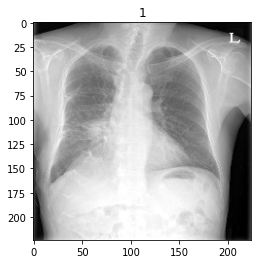

In [22]:
idx_sample = np.random.randint(len(data_train))

img, label = data_train[idx_sample]

plt.imshow(img[0], cmap='gray')
plt.title(label)
plt.show()

#### 2) DataLoader

In [23]:
from torch.utils.data import Dataset, DataLoader

loader_train = DataLoader(data_train, batch_size=8, shuffle=True)

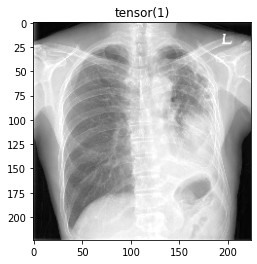

In [24]:
img, label = next(iter(loader_train))

plt.imshow(img[0][0], cmap='gray')
plt.title(label[0])
plt.show()

In [25]:
data_tuning = CXRDataset("dataset/tuning")
loader_tuning = DataLoader(data_tuning, batch_size=8, shuffle=True)

# of classes: 2
interstitialOpacity >> 100
normal >> 100


### torchvision을 활용한 classification 모델 학습

> torchvision은 PyTorch와 함께 사용되는 computer vision용 라이브러리

> The torchvision package consists of popular datasets, module architecture, and common image transformations for computer visoin.
*   torchvision.transforms
*   torchvision.datasets
*   [torchvision.models](https://pytorch.org/vision/stable/models.html)

VGG
![alt text](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [36]:
import torch
import torchvision.models as models
from torchvision.models import ResNet50_Weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# different models
#model = models.vgg16(num_classes=2).to(device)
#model = models.resnet50(num_classes=2).to(device)

# with/without pre-traned weidhts

# 1. Old weights with accuracy 76.130%
# model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# 2. New weights with accuracy 80.858%
# model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2).to(device)

# 3. Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
# model = models.resnet50(weights=ResNet50_Weights.DEFAULT).to(device)

# 4. Strings are also supported
# model = models.resnet50(weights="IMAGENET1K_V2").to(device)

# 5. No weights - random initialization
# model = models.resnet50(weights=None).to(device)

cuda


In [ ]:
from torchsummary import summary
summary(model, (3,224,224))

In [38]:
# opimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# loss function
criterion = torch.nn.CrossEntropyLoss()

# with class weights
# weights = torch.FloatTensor([1, 1.5]).cuda()
# criterion = torch.nn.CrossEntropyLoss(weight=weights) 

In [39]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    correct /= size

    print(f"Train: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")

    return train_loss, 100*correct

In [40]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, 100*correct

In [41]:
epochs = 10

train_loss, train_acc = [], []
tuning_loss, tuning_acc = [], []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    
    loss, acc = train(loader_train, model, criterion, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)

    loss, acc = test(loader_tuning, model, criterion)
    tuning_loss.append(loss)
    tuning_acc.append(acc)
print("Done!")

Epoch 1
-------------------------------
loss: 6.976396  [    0/ 1400]
loss: 0.428558  [  800/ 1400]
Train: 
 Accuracy: 86.1%, Avg loss: 0.708942 

Test: 
 Accuracy: 95.5%, Avg loss: 0.285135 

Epoch 2
-------------------------------
loss: 0.021559  [    0/ 1400]
loss: 0.027903  [  800/ 1400]
Train: 
 Accuracy: 96.3%, Avg loss: 0.103245 

Test: 
 Accuracy: 89.5%, Avg loss: 0.560436 

Epoch 3
-------------------------------
loss: 0.014473  [    0/ 1400]
loss: 0.005221  [  800/ 1400]
Train: 
 Accuracy: 98.5%, Avg loss: 0.047312 

Test: 
 Accuracy: 97.5%, Avg loss: 0.100374 

Epoch 4
-------------------------------
loss: 0.008801  [    0/ 1400]
loss: 0.128453  [  800/ 1400]
Train: 
 Accuracy: 98.6%, Avg loss: 0.043482 

Test: 
 Accuracy: 94.5%, Avg loss: 0.148069 

Epoch 5
-------------------------------
loss: 0.032281  [    0/ 1400]
loss: 0.004763  [  800/ 1400]
Train: 
 Accuracy: 98.9%, Avg loss: 0.040061 

Test: 
 Accuracy: 94.0%, Avg loss: 0.158504 

Epoch 6
---------------------------

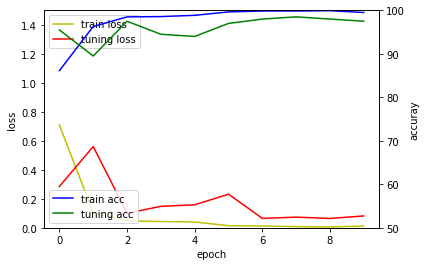

In [42]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(tuning_loss, 'r', label='tuning loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(tuning_acc, 'g', label='tuning acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### classification 모델 성능 평가하기


*   ROC (receiver operating characterstic) curve와 AUC (area under the curve)
*   confusion matrix



#### 1) Validation 데이터를 학습된 모델에 적용하기

In [67]:
data_valid = CXRDataset("dataset/valid")
loader_valid = DataLoader(data_valid, batch_size=8, shuffle=True)

# of classes: 2
interstitialOpacity >> 200
normal >> 200


In [68]:
import torch.nn.functional as nnf

y_true, y_prob = [], []

model.eval()

with torch.no_grad():
    for X, y in loader_valid:
        y_true.extend(y.numpy())
        X, y = X.to(device), y.to(device)
        pred = model(X)
        prob = nnf.softmax(pred, dim=1) ### softmax 적용하여, probability 얻기
        y_prob.extend(prob.detach().cpu().numpy()[:,1])

#### 2) ROC curve와 AUC

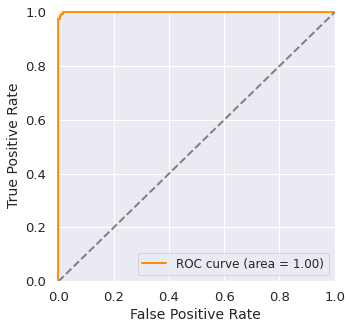

In [69]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(y_true, y_prob) ### ROC curve를 그리기 위한 fpr, tpr, th 얻기

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % auc(fpr, tpr))  #### ROC curve와 AUC
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [70]:
youden = np.argmax(tpr-fpr)
print ("Youden index:", th[youden])

Youden index: 0.47950453


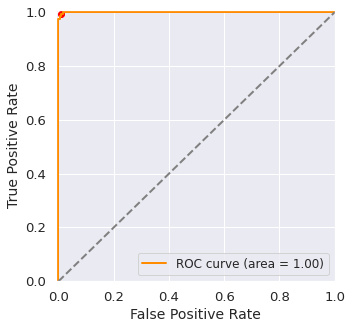

In [71]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.scatter(fpr[youden], tpr[youden], color='red') ### Youden Index 표시
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()

#### 3) Accuray와 confusion matrix

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = []
for prob in y_prob:
    if prob >= th[youden]: ### Youden Index를 이용한 classification
        y_pred.append(1)
    else:
        y_pred.append(0)

target_names = ["Normal", "Intersticial Oapcity"]
print (classification_report(y_true, y_pred, target_names=target_names)) ### accuracy report

                      precision    recall  f1-score   support

              Normal       0.99      0.99      0.99       200
Intersticial Oapcity       0.99      0.99      0.99       200

            accuracy                           0.99       400
           macro avg       0.99      0.99      0.99       400
        weighted avg       0.99      0.99      0.99       400



In [73]:
confusion_matrix(y_true, y_pred)

array([[198,   2],
       [  1, 199]])

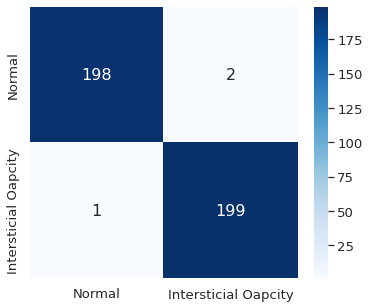

In [74]:
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), target_names, target_names) ### confusion matrix

plt.figure(figsize=(6,5))
sn.set(font_scale=1.2) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') ### heatmap을 통한 visualization
plt.show()

### Data augmentation

In [51]:
import glob
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class CXRDataset(Dataset):
    
    def __init__(self, path, transforms=None): ### transform을 이용한 data augmentation
        super().__init__()        

        self.class_names = os.listdir(path)
        print ("# of classes:", len(self.class_names))

        self.transforms = transforms ### transform
        self.data = []
        for idx in range(len(self.class_names)):
            imgs = glob.glob(os.path.join(path, self.class_names[idx], "*.png"))
            print (self.class_names[idx], ">>", len(imgs))

            for img in imgs:
                self.data.append({"img": img, "label": self.class_names[idx]})

    def __getitem__(self, index):
        # 1-channel 데이터
        #img = cv2.imread(self.data[index]["img"], 0)
        
        # 3-channel 데이터
        img = np.expand_dims(cv2.imread(self.data[index]["img"], 0), axis=2)
        img = np.concatenate([img, img, img], axis=2)
        
        if self.transforms is not None: ### image augmentation 
            img = self.transforms(img)
        img = transforms.ToTensor()(img)
        label = 0 if self.data[index]["label"] == "normal" else 1
        return img, label

    def __len__(self):
        return len(self.data)

In [52]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    #transforms.RandomResizedCrop((128,128)),
    #transforms.RandomRotation(30, expand=False),
    #transforms.RandomVerticalFlip(0.4),
    #transforms.RandomHorizontalFlip(0.4),
    #transforms.RandomAffine(30),
    transforms.ColorJitter(brightness=(0.2, 2), contrast=(0.3, 2)),
])

data_train = CXRDataset("dataset/train", transform)
loader_train = DataLoader(data_train, batch_size=8, shuffle=True)

data_tuning = CXRDataset("dataset/tuning", transform)
loader_tuning = DataLoader(data_tuning, batch_size=8, shuffle=True)

# of classes: 2
interstitialOpacity >> 700
normal >> 700
# of classes: 2
interstitialOpacity >> 100
normal >> 100


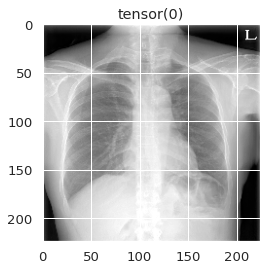

In [55]:
img, label = next(iter(loader_train))

plt.imshow(img[0][0], cmap='gray')
plt.title(label[0])
plt.show()

### AI explainability for PyTorch

https://github.com/jacobgil/pytorch-grad-cam

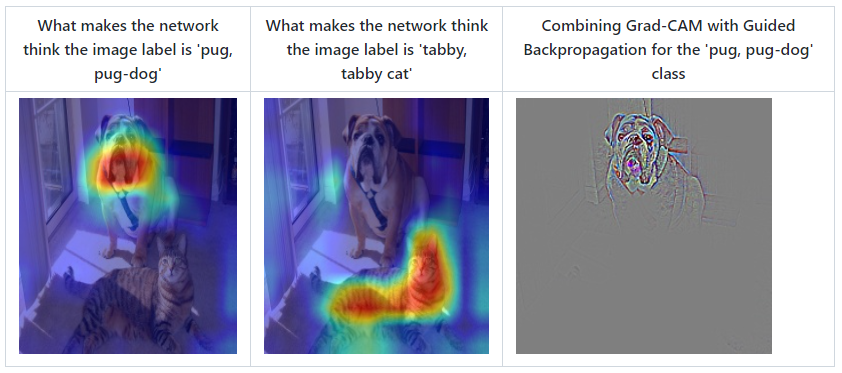

In [57]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.8 MB 28.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.3-py3-none-any.whl size=32263 sha256=ea35b95c1f5ffbb5a9dc586eacf390e1bf5e3c1c8a8ff7315d454e21e169a424
  Stored in directory: /root/.cache/pip/wheels/77/05/47/36e06c7cdf46685b5a9e30686a1f93bff3e95a91bf1404c75d
Successfully built grad-cam


In [157]:
from pytorch_grad_cam import GradCAM, ScoreCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layers = [model.layer4[-1]]
grad_cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
score_cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)

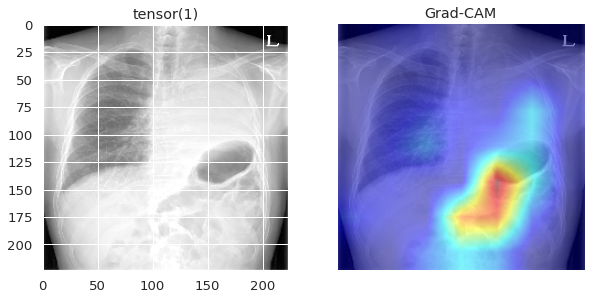

In [162]:
img, label = next(iter(loader_valid)) # batch

#idx_sample = np.where(label == 1)[0][0]
#print (idx_sample)

for idx in np.where(label == 1)[0]:
    img4cam = np.transpose(img[idx].numpy(), (1, 2, 0))
    
    cam1 = grad_cam(input_tensor=img, targets=[ClassifierOutputTarget(1)])
    vis_cam1 = show_cam_on_image(img4cam, cam1[idx, :], use_rgb=True)

    #cam2 = grad_cam(input_tensor=img, targets=[ClassifierOutputTarget(1)])
    #vis_cam2 = show_cam_on_image(img4cam, cam2[idx, :], use_rgb=True)

    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.imshow(img[idx][0], cmap='gray')
    plt.title(label[idx])

    plt.subplot(132)
    plt.imshow(vis_cam1)
    plt.axis('off')
    plt.title("Grad-CAM")

    #plt.subplot(133)
    #plt.imshow(vis_cam2)
    #plt.axis('off')
    #plt.title("ScoreCAM")

    plt.show()

    break